# Gerardo Castro Mata
# Dan Murphy
# Team 1

# Cleaning the Dataset

In [1]:
# ------------------
# Library imports
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame
# ------------------
# Read and parse through the csv file
data_df = pd.read_csv("CS105_Survey.csv")

# Grab only the columns we want to see via range
cleaning_df = data_df.loc[:, 'What is your gender?':'Do you prefer in-person or remote learning?']

# Drop the columns we think are irrelevant
cleaning_df = cleaning_df.drop(columns=['How do you feel about your progress in academics so far?',
                                       'What advice would you give to other students that might help them receive a better school experience?'])
# Display the dataframe to the console
cleaning_df

,What is your gender?,What is your ethnicity?,What academic year are you?,What is your major?,"Student GPA? (If you don't know guestimate, ex. 3.5+)",After COVID did your GPA increase or decrease?,Number of units enrolled?,Have you attended UCR prior to Spring Quarter 2020?,How is your school experience this academic year at UCR so far?,How many research or personal projects have you undertaken this academic school year? (not counting required class projects),How many hours do you spend per week participating in school clubs/organizations?,How many times have you visited office hours this academic year?,How many hours do you spend per week working on homework?,BEFORE COVID: Did you live on-campus or off-campus?,"With no financial burden, where would you prefer to live?",Where do you plan on living when campus opens? (Assuming things go back to the way it was pre-covid),Do you prefer in-person or remote learning?
0,Female,White,Sophomore,CS,3.7 - 4.0,Decrease,4.0,Yes,NaN,NaN,NaN,NaN,NaN,UCR Dorms,On-campus,On Campus Apartment,In-person (on-campus lecture)
1,Male,Asian,Sophomore,Computer Science with Business Applications,3.3 - 3.69,Increase,13.0,Yes,I enjoyed it but it could have been better,1,2,3,30,UCR Dorms,Off-campus,Off - Campus Apartment,In-person (on-campus lecture)
2,Male,Asian,Sophomore,CSBA,3.7 - 4.0,Same,4.0,Yes,I enjoyed it but it could have been better,1,3,5-10,5-10,UCR Dorms,On-campus,On Campus Apartment,In-person (on-campus lecture)
3,Male,Asian,Sophomore,Computer Science,3.7 - 4.0,Decrease,16.0,Yes,It was okay,0,2,10,7,UCR Dorms,On-campus,On Campus Apartment,In-person (on-campus lecture)
4,Female,Asian,Sophomore,Computer Science,3.3 - 3.69,Increase,12.0,Yes,I love it / I had a great time,2,5,10,14,UCR Dorms,On-campus,On Campus Apartment,In-person (on-campus lecture)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Male,Asian,Junior,CS with Business Applications,3.3 - 3.69,Same,16.0,No,I enjoyed it but it could have been better,2,0,0,10,Off-campus Apartments,Off-campus,Off - Campus Apartment,Remote-learning (Online instruction)
74,Male,Asian,Sophomore,CS,3.7 - 4.0,Increase,17.0,Yes,It wasn't very good,0,0,0,13,UCR Dorms,On-campus,On Campus Apartment,In-person (on-campus lecture)
75,Male,Asian,Sophomore,ENCS,3.3 - 3.69,Same,13.0,Yes,It wasn't very good,0,0,12,9,UCR Dorms,On-campus,On Campus Apartment,In-person (on-campus lecture)
76,Male,Asian;White,Senior/Senior+,Computer Science,3.3 - 3.69,Same,12.0,Yes,It was okay,1,0,4,4,On-campus Apartments,On-campus,Graduating this year,In-person (on-campus lecture)


In [2]:
# Change all computer science values into one value -> 'CS'
cleaning_df['What is your major?'] = cleaning_df['What is your major?'].replace(['Computer Science', 
                                                                                     'Computer Science (ENCS)',
                                                                                     'Computer science',
                                                                                     'ENCS',
                                                                                     'computer science',
                                                                                     'Computer science '], 'CS')
# Change all computer science w/ business applications values to one value -> 'CSBA'
cleaning_df['What is your major?'] = cleaning_df['What is your major?'].replace(['CS with Business Applications',
                                                                                 'Computer Science w/ Business Applications',
                                                                                 'Computer Science with Business Applications',
                                                                                 'computer science with business applications',
                                                                                 'csba'], 'CSBA')
# Change all computer engineering values to one value -> 'CE'
cleaning_df['What is your major?'] = cleaning_df['What is your major?'].replace(['Computer Eng',
                                                                                 'Computer Eng.',
                                                                                 'Computer Engineering',
                                                                                'Computer engineering'], 'CE')
#Checking if we missed updating any majors
#cleaning_df.groupby('What is your major?')['What is your major?'].count()

In [3]:
# Rename this column so it is shorter and easier to read when writing code based on that column
cleaning_df = cleaning_df.rename(columns={'Where do you plan on living when campus opens? (Assuming things go back to the way it was pre-covid)':'Where do you plan on living when campus opens?'})

In [4]:
# Combining like-data to fall under one of three categories:

# On-campus
cleaning_df['Where do you plan on living when campus opens?'] = cleaning_df['Where do you plan on living when campus opens?'].replace(["On Campus Apartment",
                                                                                                                                       "UCR Dorms"], "On-campus")

# Off-campus
cleaning_df['Where do you plan on living when campus opens?'] = cleaning_df['Where do you plan on living when campus opens?'].replace(["Off - Campus Apartment",
                                                                                                                                       "Off-campus home",
                                                                                                                                       "Parent's house",
                                                                                                                                       "Home",
                                                                                                                                       "at home",
                                                                                                                                       "home",
                                                                                                                                       "with parents",
                                                                                                                                       "off-campus, Parents house"], "Off-campus")

# Other
cleaning_df['Where do you plan on living when campus opens?'] = cleaning_df['Where do you plan on living when campus opens?'].replace(["Debating between off-campus apartment or UCR dorm",
                                                                                                                                       "Done with school before campus opens",
                                                                                                                                       "Graduating",
                                                                                                                                       "Graduating this year",
                                                                                                                                       "I will be graduated by the time COVID-19 restrictions have lifted",
                                                                                                                                       "I'll be graduated by that time",
                                                                                                                                       "I'm graduating",
                                                                                                                                       "Same place I live now.",
                                                                                                                                       "Whatever is most affordable"], "Other")

In [5]:
# Refining ethnicity column to one/two word answers:

# Latino/Hispanic
cleaning_df['What is your ethnicity?'] = cleaning_df['What is your ethnicity?'].replace(['Hispanic or Latino or Spanish Origin'], 'Latino/Hispanic')

# African American
cleaning_df['What is your ethnicity?'] = cleaning_df['What is your ethnicity?'].replace(['Black or African American'], 'African American')

# Middle Eastern
cleaning_df['What is your ethnicity?'] = cleaning_df['What is your ethnicity?'].replace(['middle eastern '], 'Middle Eastern')

# Multi
cleaning_df['What is your ethnicity?'] = cleaning_df['What is your ethnicity?'].replace(['Asian;White',
                                                                                         'Asian;Native Hawaiian or Pacific Islander',
                                                                                         'American Indian or Alaska Native;Black or African American',
                                                                                         'Hispanic or Latino or Spanish Origin;White'], 'Multi')

## What information do you have?
The cleaned and refined collection of data encapsulates UCR students data portraying evidence for UCR student housing preference and external variable correlation. The information originates from a survey distributed to select courses within the College of Engineering. As a majority of the population are STEM students, this dataset will show clear bias towards those in the STEM field. Hence, all other groups outside of STEM will not be fairly represented as they fall outside of the scope of this survey.

## What would you like to know about the class?
What we are interested in finding out is each student's preference on living on-campus or off-campus.

## Explore the data

In [6]:
# Display the count of each respective category: on-campus, off-campus and other
cleaning_df.groupby('Where do you plan on living when campus opens?')['Where do you plan on living when campus opens?'].count()

Where do you plan on living when campus opens?
Off-campus    38
On-campus     31
Other          9
Name: Where do you plan on living when campus opens?, dtype: int64

In [7]:
# Display the count of each ethnicity
cleaning_df.groupby('What is your ethnicity?')['Where do you plan on living when campus opens?'].count()

What is your ethnicity?
African American     1
Asian               51
Latino/Hispanic     11
Middle Eastern       2
Multi                7
White                6
Name: Where do you plan on living when campus opens?, dtype: int64

Where do you plan on living when campus opens?,Off-campus,On-campus,Other
What is your ethnicity?,,,
African American,1,0,0
Asian,25,23,3
Latino/Hispanic,7,3,1
Middle Eastern,1,1,0
Multi,1,2,4
White,3,2,1


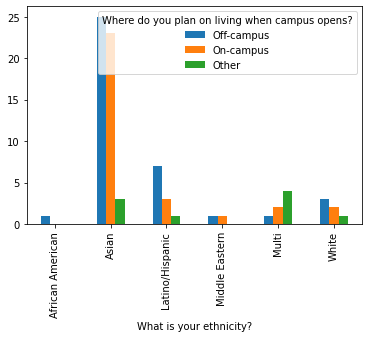

In [8]:
# Visualization of Ethnicity and Housing Preference
# Contingency table
ethnicity_to_housing_preference = pd.crosstab(cleaning_df['What is your ethnicity?'], cleaning_df['Where do you plan on living when campus opens?'])
# Bar plot
ethnicity_to_housing_preference.plot(kind='bar')
# Display table
ethnicity_to_housing_preference


From this bar graph, we see that a majorty of enthinicites prefer to live off-campus.

In [9]:
'''
We create a conditional distribution table by summing the rows over ethncity and diviiding by each column's total
Note: Rows add up to 1
'''
ethnicity_to_housing_count = ethnicity_to_housing_preference.sum(axis=0)
ethnicity_given_housing = ethnicity_to_housing_preference.divide(ethnicity_to_housing_count, axis=1)
display(ethnicity_given_housing)

Where do you plan on living when campus opens?,Off-campus,On-campus,Other
What is your ethnicity?,,,
African American,0.026316,0.000000,0.000000
Asian,0.657895,0.741935,0.333333
Latino/Hispanic,0.184211,0.096774,0.111111
Middle Eastern,0.026316,0.032258,0.000000
Multi,0.026316,0.064516,0.444444
White,0.078947,0.064516,0.111111


We can now answer questions such as "What proportion of students that plan to live On-campus are Latino/Hispanic?". We notate the condition probability as follows:
$$ P\big(\textrm{Latino/Hispanic}\ \big|\ \textrm{On-campus}\big) = 0.097.$$


Do you prefer in-person or remote learning?,Combined (Online + on-campus),In-person (on-campus lecture),Remote-learning (Online instruction)
"With no financial burden, where would you prefer to live?",,,
Off-campus,15,11,3
On-campus,14,31,4


<AxesSubplot:xlabel='With no financial burden, where would you prefer to live?'>

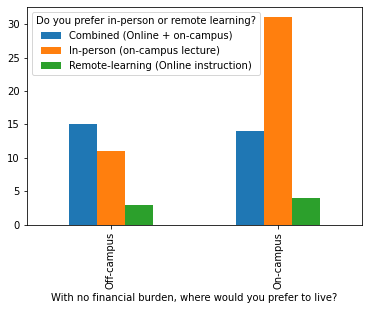

In [10]:
# Generate a chi-squred test with 'with no financial burden..' and 'do you prefer in-class or remote learning?'
financial_burden_to_learning_preference = pd.crosstab(cleaning_df['With no financial burden, where would you prefer to live?'],
                                                     cleaning_df['Do you prefer in-person or remote learning?'])
display(financial_burden_to_learning_preference)
financial_burden_to_learning_preference.plot(kind='bar')

From this bar graph, we see that those that chose off-campus mainly prefered a combination of in-person and remote learning, and those that chose to live on-campus mainly prefered in-person learning. This could suggest that there is a dependency between the two variables.

## Chi-Squared Test 1
### Variables
### - With no financial burden, where would you prefer to live?
### - Do you prefer in-person or remote learning?
#### Hypothesis
With this bar graph, we can formulate a hypothesis and state that there is a dependency between the variables: `With no financial burden, where would you prefer to live?` and `Do you prefer in-person or remote learning?`. We think that the dependency will influence whether students prefer to live on-campus or off-campus. Those that chose to live off-campus with no financial burden mainly chose to have a combined learning session. Students still prefer to be on campus to learn, but are also confortable with staying home and learn from there. When analyzing those that prefer to live on-campus with no financial burden, a majority chose to have in-person learning. We think that since students are living on-campus, it will be easier to keep up with course work, have a social life, join clubs, etc. because they are only minutes away from their apartment.<br><br>

To check for a dependency, we will conduct a `chi-squared` test on these two variables.
We set the null hypothesis and alternative hypothesis to be:<br>
Null Hypothesis: Living preferenence and learning preference are independent<br>
Alternative Hypothesis: Living preference and learning preference are dependent<br>

#### Code to generate the Chi-Squared Value

In [11]:
# Library method call -> chi-square test
table = financial_burden_to_learning_preference # 2D array - uses crosstab from above
chi, p, dof, expected = chi2_contingency(table)# Chi-Square Test method call from library import
alpha = 0.05                                    # 95% Certainty

# Output values to the console
print(f'Chi-value : {chi}')
print(f'P-Value : {p}')
print(f'Degree of freedom : {dof}')
print('Expectation : ')
print(expected)
# Determine whether to reject or fail to reject the null hypothesis
if p <= alpha:
    print("\nWe reject the null hypothesis")
else:
    print("\nWe fail to reject the null hypothesis")

Chi-value : 4.894755999902934
P-Value : 0.08652014517599349
Degree of freedom : 2
Expectation : 
[[10.78205128 15.61538462  2.6025641 ]
 [18.21794872 26.38461538  4.3974359 ]]

We fail to reject the null hypothesis


#### Conclusion
After calculating the chi-squared value, we fail to reject the null hypthesis and conclude that both variables are independent.<br>
The chi-squared test proved our hypothesis to be false as we believed that there is a correlation between not having a financial burden and learning preference. We can then say that a student's living preference is not dependent on financial stability and learning preference. Our work is checked by computing the chi-squared test by hand and receiving the same result. We used arbitrary values close to the values in the table.

In [12]:
# Display chi-square test computed by hand. Used arbitrary values close to the values in the table.
IFrame("chi-square-test1.png", width=950, height=750)

## Box Plot
### Variables
### - How is your school experience this academic year at UCR so far?
### - Student GPA? (If you don\'t know guestimate, ex. 3.5+)

<AxesSubplot:xlabel='GPA', ylabel='School_Experience'>

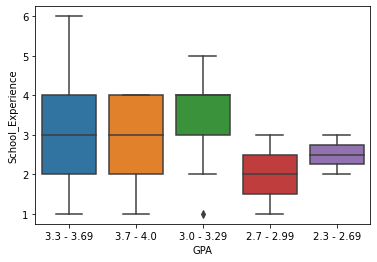

In [13]:
# Do some more cleaning to change the student's school experience into a numberical scale
# NaN -> 0
cleaning_df['How is your school experience this academic year at UCR so far?'] = cleaning_df.loc[:, 'How is your school experience this academic year at UCR so far?'].fillna(0)
cleaning_df = cleaning_df.replace('I love it / I had a great time', 1)
cleaning_df = cleaning_df.replace('I enjoyed it but it could have been better', 2)
cleaning_df = cleaning_df.replace('It was okay', 3)
cleaning_df = cleaning_df.replace('It wasn\'t very good', 4)
cleaning_df = cleaning_df.replace('I hated being here', 5)
cleaning_df = cleaning_df.replace('I did not attend UCR last academic school year', 6)

#Store the GPA column and school experience column into their own series
GPA_series = cleaning_df.loc[:, 'Student GPA? (If you don\'t know guestimate, ex. 3.5+)']
School_experience_series = cleaning_df.loc[:, 'How is your school experience this academic year at UCR so far?']
#Create a new dataframe that holds the data from both series
d = {'GPA': GPA_series,
     'School_Experience': School_experience_series}
GPA_school_experience = pd.DataFrame(data=d)

#Dropping the first row which contains the value of 0 for school experience as it was NaN
GPA_school_experience = GPA_school_experience.drop(0)
# Box plot
sns.boxplot(x="GPA", y="School_Experience", data=GPA_school_experience)

According to this box plot, we see that an average of all students' GPA's reside within the 2-4 range where 2 means 'I enjoyed it but it could have been better' and 4 means 'It wasn't very good'. Those with a higher GPA (3.3 - 4.0) lie within the same range and means that some are enjoying their acadmic year and some do not enjoy their academic year. Those that have 3.0 - 3.29 GPAs are either having an 'okay' experience or are not enjoying it at all. Lastly, the rest of the GPAs (2.3 - 2.99) lie mostly within 3 and below which means they are mostly enjoying their academic year. In conclusion, we get a mix of data on whether students prefer to live on-campus or off-campus based on their school experience and GPAs.

## Chi-Squared Test 2
### Variables
### - How is your school experience this academic year at UCR so far?
### - Do you prefer in-person or remote learning?

### Hypothesis
We believe comparing a student's school experience and learning preference can help us understand whether they prefer to live on-campus or off-campus. In theory, if a student is having a bad experience and they prefer in-person learning, then there is a high chance of them preferring ot live on-campus. Therefore, formulate a hypothesis by stating that both variables depend on each other. To test our hypothesis, we use a chi-squared test.<br>
Null Hypothesis: Student's school experience and learning preference are independent.<br>
Alternative Hypothesis: Student's school experience and learning preference are dependent.<br>

In [14]:
#Chi-squared test on school experience and learning preference

#Contingency table
School_experience_to_learning_preference = pd.crosstab(cleaning_df['How is your school experience this academic year at UCR so far?'],
                                                      cleaning_df['Do you prefer in-person or remote learning?'])

#Drop the row with the value of 0 since it is not part of the scale
School_experience_to_learning_preference = School_experience_to_learning_preference.drop([0])
#Display the table
display(School_experience_to_learning_preference)

# Library method call -> chi-square test
table = School_experience_to_learning_preference # 2D array - uses crosstab from above
chi, p, dof, expected = chi2_contingency(table)# Chi-Square Test method call from library import
alpha = 0.05                                    # 95% Certainty

# Output values to the console
print(f'Chi-value : {chi}')
print(f'P-Value : {p}')
print(f'Degree of freedom : {dof}')
print('Expectation : ')
print(expected)
# Determine whether to reject or fail to reject the null hypothesis
if p <= alpha:
    print("\nWe reject the null hypothesis")
else:
    print("\nWe fail to reject the null hypothesis")


Do you prefer in-person or remote learning?,Combined (Online + on-campus),In-person (on-campus lecture),Remote-learning (Online instruction)
How is your school experience this academic year at UCR so far?,,,
1,2,3,3
2,12,8,1
3,9,14,2
4,6,13,0
5,0,2,0
6,0,1,1


Chi-value : 20.287060080815998
P-Value : 0.026651554227555434
Degree of freedom : 10
Expectation : 
[[ 3.01298701  4.25974026  0.72727273]
 [ 7.90909091 11.18181818  1.90909091]
 [ 9.41558442 13.31168831  2.27272727]
 [ 7.15584416 10.11688312  1.72727273]
 [ 0.75324675  1.06493506  0.18181818]
 [ 0.75324675  1.06493506  0.18181818]]

We reject the null hypothesis


### Conclusion
The null hypothsis is rejected which means that both variables are dependent. This proves our hypothesis to be true and we can now say that a student's experience so far in this academic year and their learning preference are correlated. Our work is checked by computing the chi-square test by hand, but this time using the same values as the table.

In [15]:
# Display the chi-square test computed by hand. Same values as above.
IFrame("chi-square-test2.png", width=950, height=750)

## Stacked Bar Graph
### Variables
### - How is your school experience this academic year at UCR so far?
### - Do you prefer in-person or remote learning?
	

Do you prefer in-person or remote learning?,Combined (Online + on-campus),In-person (on-campus lecture),Remote-learning (Online instruction)
How is your school experience this academic year at UCR so far?,,,
1,0.068966,0.073171,0.428571
2,0.413793,0.195122,0.142857
3,0.310345,0.341463,0.285714
4,0.206897,0.317073,0.000000
5,0.000000,0.048780,0.000000
6,0.000000,0.024390,0.142857


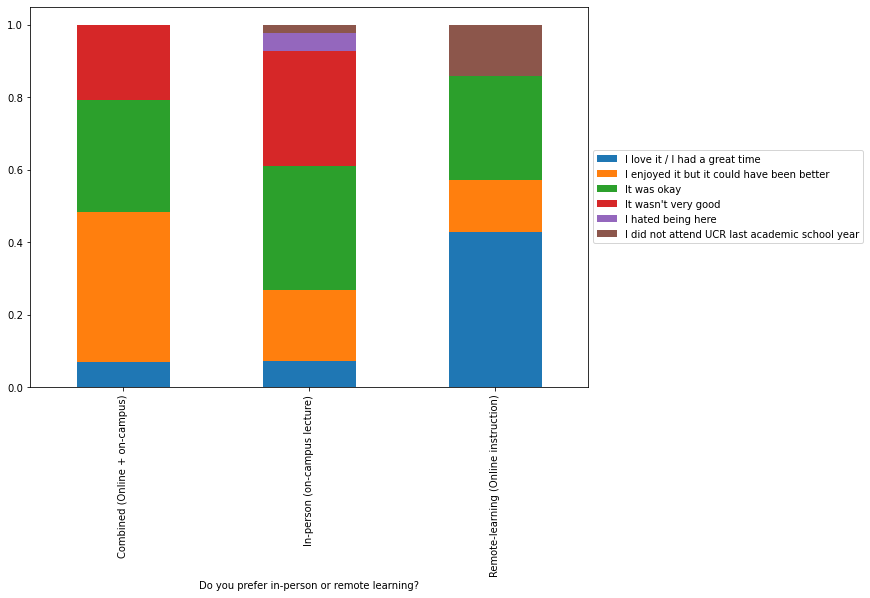

In [16]:
# Creating a condition distribution table to plot as a stacked bar graph for school experience and learning preference
School_experience_to_learning_preference_count = School_experience_to_learning_preference.sum(axis=0)
School_experience_given_learning_preference = School_experience_to_learning_preference.divide(School_experience_to_learning_preference_count, axis=1)
display(School_experience_given_learning_preference)
ax = (School_experience_given_learning_preference.T).plot(kind='bar', stacked=True, figsize=(10,7))
ax.legend(['I love it / I had a great time', 
           'I enjoyed it but it could have been better', 
           'It was okay', 
           'It wasn\'t very good', 
           'I hated being here', 
           'I did not attend UCR last academic school year'],loc='center left', bbox_to_anchor=(1.0,0.5))

To get another view of the chi-squared test, we use a stacked bar graph by creating a conditional distribution table. From looking at the bar graph, we see that those that prefer a combination of online and in-person learning are mostly saying that they don't think their experience was any good to they enjoy it, but could've been better.<br>
Those that prefer in-person lecture have a majority stating their experience was okay and not very good.<br>
However, the same cannot be said about those who prefer remote learning as a majority said that they are have a great this this acadmic year.<br>
From this bar graph and the chi-squared test, we can state that a student's experience this acadmic year and their learning preference are correlated. It tells us more whether a student prefers to live on-campus or off-campus based on these data values. 